In [1]:
%run Scaffold_Y_lipo.ipynb

In [4]:
from collections.abc import Mapping
from cameo import models
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fseof = FSEOF(model)
result = fseof.run(target=model.reactions.DM_Eicosapentaenoic_Acid)
df = result.data_frame
df

,1,2,3,4,5,6,7,8,9,10
ACOAH,0.255193,0.459816,0.584248,0.708681,0.833114,0.957546,1.081979,1.206244,1.330152,1.454059
ACONT,0.000000,0.008132,0.007258,0.006383,0.005509,0.004634,0.003760,0.002877,0.001978,0.001079
ACRNtm,0.036568,0.105286,0.093964,0.082642,0.071320,0.059999,0.048677,0.037253,0.025613,0.013973
ASAD,-0.004521,-0.004090,-0.003651,-0.003211,-0.002771,-0.002331,-0.001891,-0.001447,-0.000995,-0.000543
ASPK,0.004521,0.004090,0.003651,0.003211,0.002771,0.002331,0.001891,0.001447,0.000995,0.000543
...,...,...,...,...,...,...,...,...,...,...
D9E,0.014310,0.028620,0.042931,0.057241,0.071551,0.085861,0.100171,0.114481,0.128792,0.143102
D8ds,0.014310,0.028620,0.042931,0.057241,0.071551,0.085861,0.100171,0.114481,0.128792,0.143102
D5ds,0.014310,0.028620,0.042931,0.057241,0.071551,0.085861,0.100171,0.114481,0.128792,0.143102
D17ds,0.014310,0.028620,0.042931,0.057241,0.071551,0.085861,0.100171,0.114481,0.128792,0.143102


A change of flux is seen in 67 of the reactions, including the reactions that are inserted heterologously. The reactions giving equal numbers (such as the inserted pathway) is due to the reactions running only one way. 

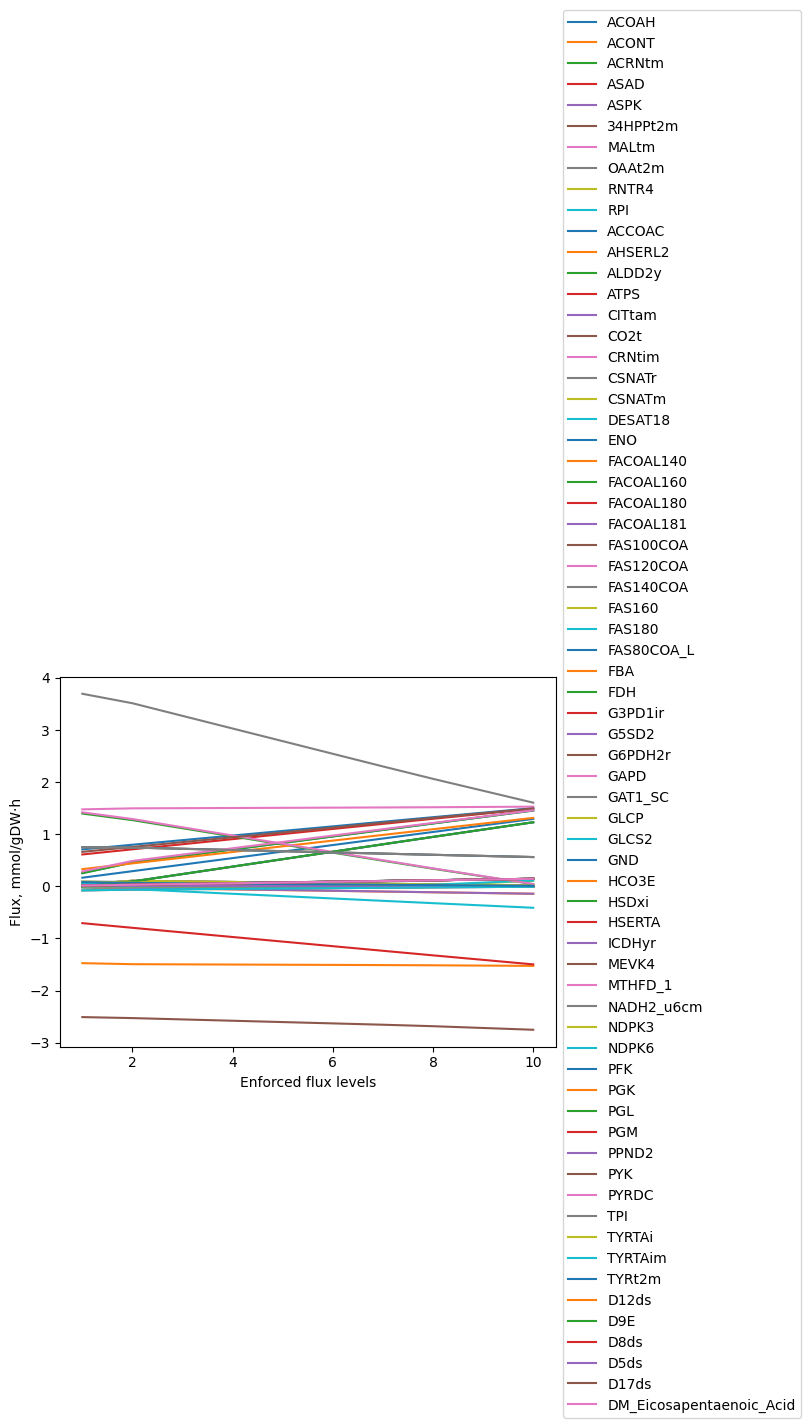

In [6]:
from matplotlib import pyplot as plt
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))
plt.xlabel("Enforced flux levels")
plt.ylabel("Flux, mmol/gDW·h")
plt.show()

This plot doensn't prove any valuable information, but it can be visualized in a better way:

/tmp/ipykernel_4232/1627135296.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.index, rotation=90, ha='center')


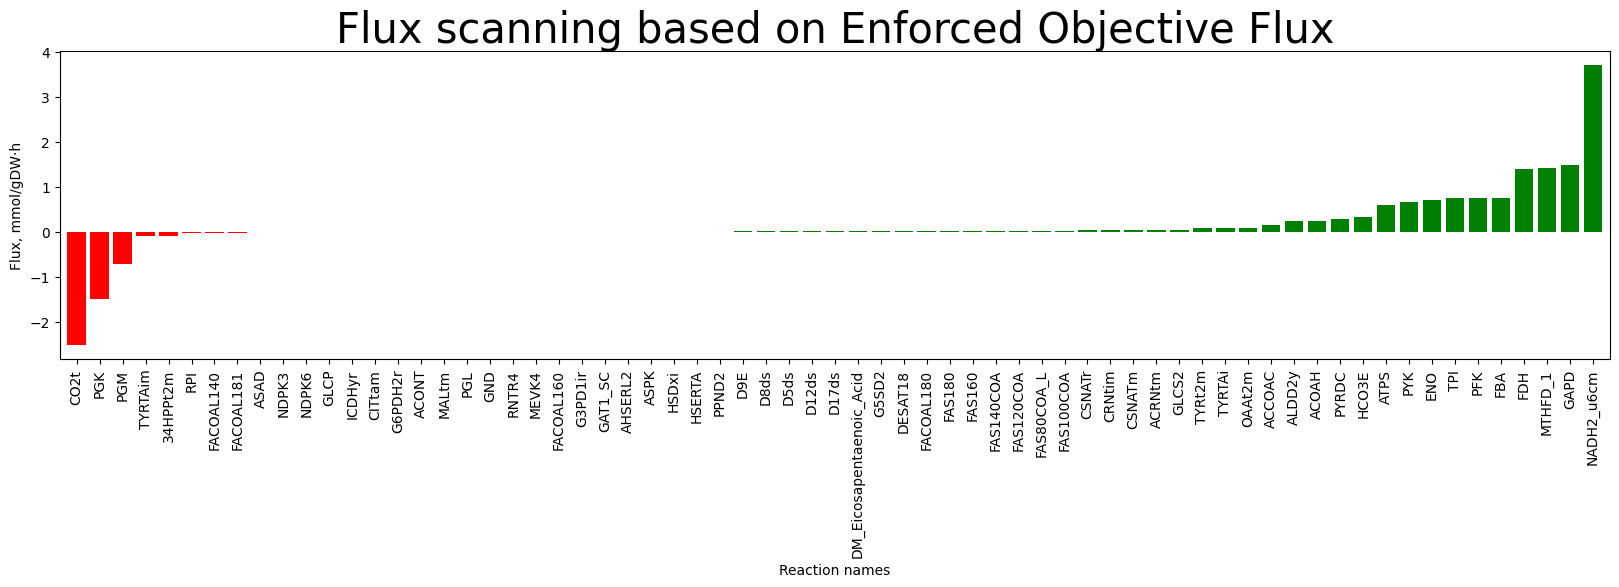

In [7]:
df = df.sort_values(by=df.columns[0], ascending=True)

def bar_color(df, color1, color2):
    return np.where(df.values >= 0, color1, color2)

fig, ax = plt.subplots(figsize=(20, 4))
bars = ax.bar(df.index, df[df.columns[0]], color=bar_color(df[df.columns[0]], 'green', 'red'))

ax.set_ylabel('Flux, mmol/gDW·h')
ax.set_xlabel('Reaction names')
ax.set_title('Flux scanning based on Enforced Objective Flux', size=30)

ax.set_xticklabels(df.index, rotation=90, ha='center')
ax.margins(x=0.005)


plt.show()

This plot visualizes the fluxes that provide a negative (red) effect on the production of EPA, and a positive (green) effect. This also means that the ones scoring around 0 has close to no effect on the final flux of EPA, and can therefore be neglected. We can then sort the top 5 negatives against the top 5 positives.

In [8]:
from pytest import approx

removed_zero = (df != approx(0.0)).all(axis=1)
df = df.loc[removed_zero]
df

,1,2,3,4,5,6,7,8,9,10
CO2t,-2.510131,-2.529200,-2.554671,-2.580143,-2.605615,-2.631086,-2.656558,-2.684830,-2.719064,-2.753298
PGK,-1.475488,-1.495011,-1.498434,-1.501857,-1.505279,-1.508702,-1.512124,-1.516272,-1.521963,-1.527654
PGM,-0.707737,-0.797036,-0.885206,-0.973376,-1.061546,-1.149716,-1.237886,-1.325563,-1.412188,-1.498814
TYRTAim,-0.079661,-0.063938,-0.057062,-0.050187,-0.043311,-0.036436,-0.029560,-0.022623,-0.015554,-0.008486
34HPPt2m,-0.079661,-0.063938,-0.057062,-0.050187,-0.043311,-0.036436,-0.029560,-0.022623,-0.015554,-0.008486
...,...,...,...,...,...,...,...,...,...,...
FBA,0.749900,0.743275,0.720001,0.696727,0.673453,0.650179,0.626904,0.604115,0.582359,0.560603
FDH,1.395423,1.269221,1.113354,0.957486,0.801619,0.645752,0.489885,0.336577,0.188719,0.040861
MTHFD_1,1.418617,1.290206,1.132082,0.973958,0.815834,0.657710,0.499586,0.344002,0.193824,0.043646
GAPD,1.475488,1.495011,1.498434,1.501857,1.505279,1.508702,1.512124,1.516272,1.521963,1.527654


Text(0.5, 1.0, 'Flux scanning based on Enforced Objective Flux')

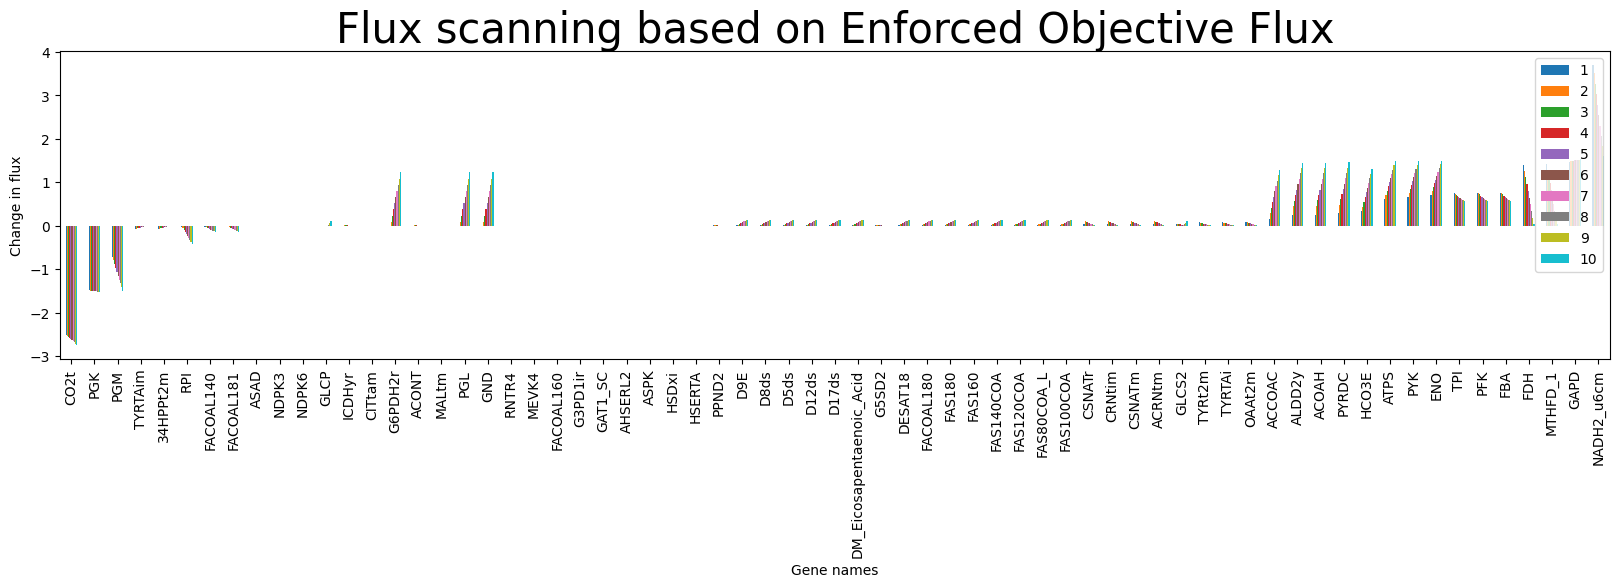

In [9]:
def bar_color(df,color2,color3):
    return np.where(df.values >=0,color2,color3).T

fig = df.plot(legend=True, kind='bar',figsize=(20, 4), grid =False)
fig.set_ylabel('Change in flux')
fig.set_xlabel('Gene names')
fig.set_title('Flux scanning based on Enforced Objective Flux', size=30)

In [24]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[10] +1

In [25]:
target_reactions_df = df[df['relative_change_in_flux'] > 1.8]

In [26]:
target_reactions_df

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
RPI,-0.025974,-0.053955,-0.099034,-0.144113,-0.189192,-0.234270,-0.279349,-0.324139,-0.368312,-0.412486,1.937031
FACOAL181,-0.014310,-0.028620,-0.042931,-0.057241,-0.071551,-0.085861,-0.100171,-0.114481,-0.128792,-0.143102,1.900001
GLCP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014551,0.060085,0.105619,2.000000
ICDHyr,0.000000,0.008132,0.007258,0.006383,0.005509,0.004634,0.003760,0.002877,0.001978,0.001079,2.000000
CITtam,0.000000,-0.008132,-0.007258,-0.006383,-0.005509,-0.004634,-0.003760,-0.002877,-0.001978,-0.001079,2.000000
G6PDH2r,0.000000,0.091369,0.234186,0.377003,0.519820,0.662637,0.805454,0.947472,1.087787,1.228101,2.000000
ACONT,0.000000,0.008132,0.007258,0.006383,0.005509,0.004634,0.003760,0.002877,0.001978,0.001079,2.000000
MALtm,0.000000,-0.008132,-0.007258,-0.006383,-0.005509,-0.004634,-0.003760,-0.002877,-0.001978,-0.001079,2.000000
PGL,0.000259,0.091602,0.234395,0.377187,0.519979,0.662771,0.805563,0.947555,1.087844,1.228132,1.999789
GND,0.000259,0.091602,0.234395,0.377187,0.519979,0.662771,0.805563,0.947555,1.087844,1.228132,1.999789


In [27]:

df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)

Text(0.5, 1.0, 'Reactions with a relative change in Flux > 80%')

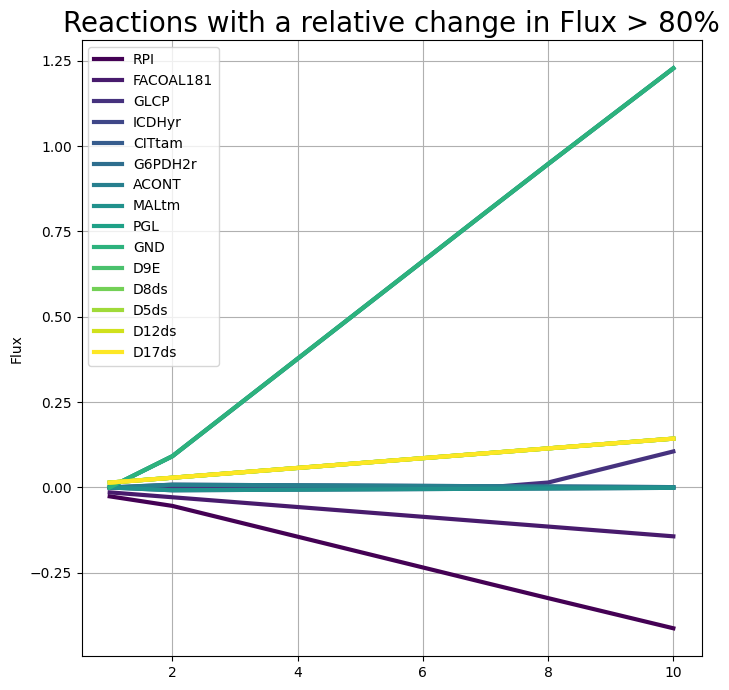

In [28]:
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 80%', size=20)

In [21]:
#lowest flux reactions
target_reactions_df.tail()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
D9E,0.01431,0.02862,0.042931,0.057241,0.071551,0.085861,0.100171,0.114481,0.128792,0.143102,1.900001
D8ds,0.01431,0.02862,0.042931,0.057241,0.071551,0.085861,0.100171,0.114481,0.128792,0.143102,1.900001
D5ds,0.01431,0.02862,0.042931,0.057241,0.071551,0.085861,0.100171,0.114481,0.128792,0.143102,1.900001
D12ds,0.01431,0.02862,0.042931,0.057241,0.071551,0.085861,0.100171,0.114481,0.128792,0.143102,1.900001
D17ds,0.01431,0.02862,0.042931,0.057241,0.071551,0.085861,0.100171,0.114481,0.128792,0.143102,1.900001


In [22]:

#higest flux reactions
target_reactions_df.head()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
RPI,-0.025974,-0.053955,-0.099034,-0.144113,-0.189192,-0.234270,-0.279349,-0.324139,-0.368312,-0.412486,1.937031
FACOAL181,-0.014310,-0.028620,-0.042931,-0.057241,-0.071551,-0.085861,-0.100171,-0.114481,-0.128792,-0.143102,1.900001
GLCP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014551,0.060085,0.105619,2.000000
ICDHyr,0.000000,0.008132,0.007258,0.006383,0.005509,0.004634,0.003760,0.002877,0.001978,0.001079,2.000000
CITtam,0.000000,-0.008132,-0.007258,-0.006383,-0.005509,-0.004634,-0.003760,-0.002877,-0.001978,-0.001079,2.000000
